In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

In [2]:
df = pd.read_csv('final_data.csv')

unnecessary_vars = [
    'packages', 'screenshots', 'movies', 'score_rank', 'header_image',
    'reviews', 'website', 'support_url', 'notes', 'support_email',
    'recommendations', 'user_score', 'median_playtime_forever',
    'median_playtime_2weeks', 'required_age', 'metacritic_score',
    'metacritic_url', 'peak_ccu', 'positive', 'negative'
]

# Drop unnecessary variables
df = df.drop(columns=unnecessary_vars)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97410 entries, 0 to 97409
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      97404 non-null  object 
 1   release_date              97410 non-null  object 
 2   price                     97410 non-null  float64
 3   dlc_count                 97410 non-null  int64  
 4   detailed_description      92562 non-null  object 
 5   about_the_game            92540 non-null  object 
 6   short_description         92631 non-null  object 
 7   windows                   97410 non-null  bool   
 8   mac                       97410 non-null  bool   
 9   linux                     97410 non-null  bool   
 10  achievements              97410 non-null  int64  
 11  supported_languages       97410 non-null  object 
 12  full_audio_languages      97410 non-null  object 
 13  developers                97410 non-null  object 
 14  publis

In [4]:
#remove rows where tags is like '[]'
df = df[df['tags'] != '[]']
print(df.info())
# tags are available in a dictionary with key as tag and value as an integer
# we will convert this to a list of tags
df['tags'] = df['tags'].apply(lambda x: list(eval(x).keys()))
print(df['tags'].head())

<class 'pandas.core.frame.DataFrame'>
Index: 67647 entries, 0 to 97403
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      67647 non-null  object 
 1   release_date              67647 non-null  object 
 2   price                     67647 non-null  float64
 3   dlc_count                 67647 non-null  int64  
 4   detailed_description      67578 non-null  object 
 5   about_the_game            67561 non-null  object 
 6   short_description         67633 non-null  object 
 7   windows                   67647 non-null  bool   
 8   mac                       67647 non-null  bool   
 9   linux                     67647 non-null  bool   
 10  achievements              67647 non-null  int64  
 11  supported_languages       67647 non-null  object 
 12  full_audio_languages      67647 non-null  object 
 13  developers                67647 non-null  object 
 14  publishers 

In [5]:
# Fields with missing values
def is_empty(cell):
    if isinstance(cell, list):
        return len(cell) == 0
    elif isinstance(cell, str):
        return cell == '' or cell == '[]'
    else:
        return pd.isna(cell)
print(df.map(is_empty).sum())

name                            0
release_date                    0
price                           0
dlc_count                       0
detailed_description           69
about_the_game                 86
short_description              14
windows                         0
mac                             0
linux                           0
achievements                    0
supported_languages            18
full_audio_languages        37482
developers                      0
publishers                      0
categories                    947
genres                         68
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
tags                            0
aggregate_score                 0
dtype: int64


In [6]:
df = df[df['categories'] != '[]']
df = df[df['genres'] != '[]']
df = df[df['about_the_game'].isna() == False]
df = df[df['short_description'].isna() == False]
df = df[df['supported_languages'] != '[]']
print(df.map(is_empty).sum())
df.info()

name                            0
release_date                    0
price                           0
dlc_count                       0
detailed_description            0
about_the_game                  0
short_description               0
windows                         0
mac                             0
linux                           0
achievements                    0
supported_languages             0
full_audio_languages        36713
developers                      0
publishers                      0
categories                      0
genres                          0
estimated_owners                0
average_playtime_forever        0
average_playtime_2weeks         0
tags                            0
aggregate_score                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 66543 entries, 0 to 97403
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                

In [7]:
#store data in a new csv file
df.to_csv('final_data_cleaned.csv', index=False)

In [9]:
df['release_date'] = pd.to_datetime(df['release_date'], format='mixed')

Timestamp('1997-06-30 00:00:00')

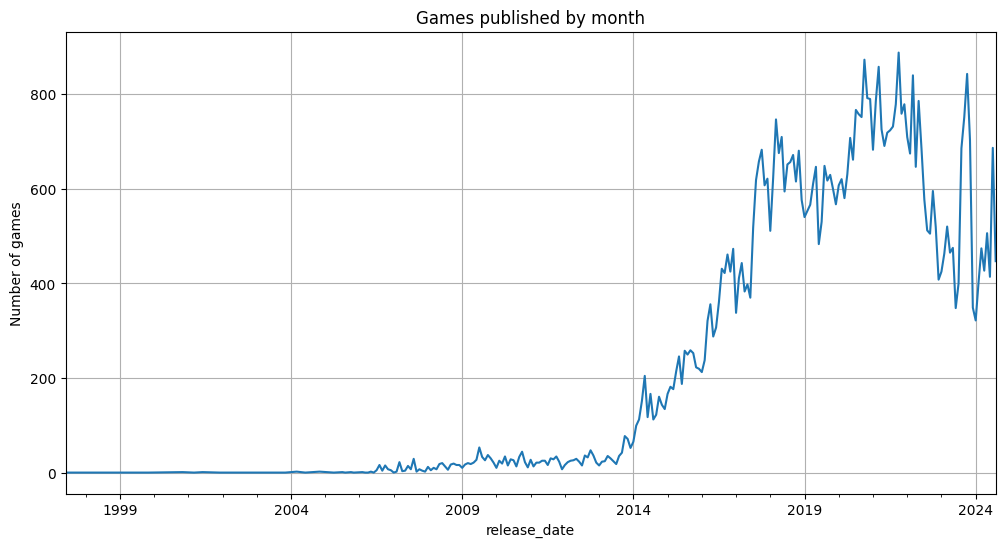

In [13]:
# Number of games published by month
plt.figure(figsize=(12, 6))
df.groupby(df['release_date'].dt.to_period('M')).size().plot(kind='line')
plt.title('Games published by month')
plt.ylabel('Number of games')
plt.grid(True)
plt.show()

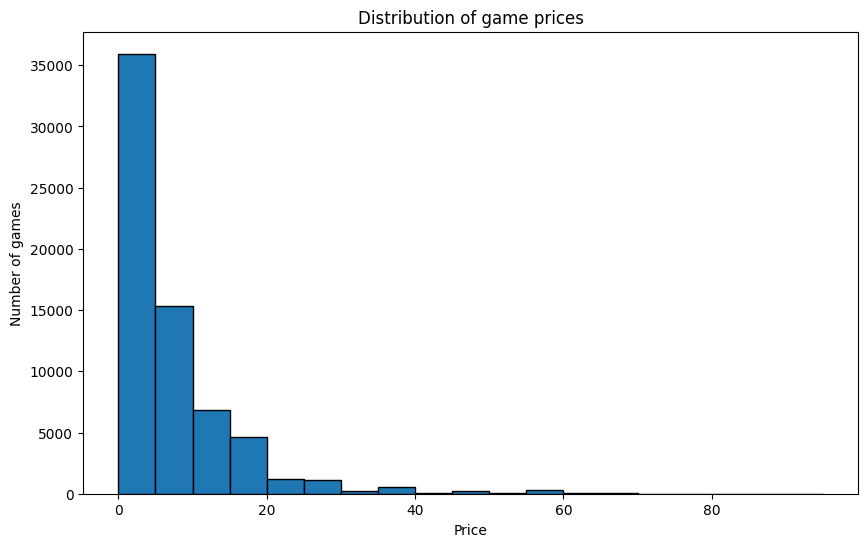

In [16]:
bins = range(0, 100, 5)
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=bins, edgecolor='black')
plt.title('Distribution of game prices')
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

In [18]:
# Proportion of free games
round(df[df['price'] == 0].shape[0] / df.shape[0], 2) * 100

11.0

In [23]:
# Games with a price over $100
df[df['price'] > 100].shape[0]

28

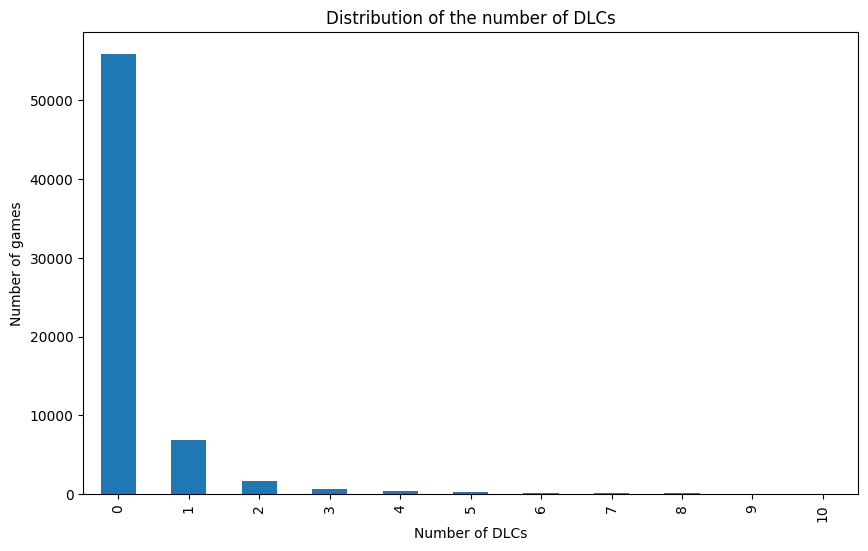

In [27]:
# Number of DLCs (up to 10)
dlc_counts = df['dlc_count'].value_counts().sort_index()
dlc_counts = dlc_counts[dlc_counts.index <= 10]
plt.figure(figsize=(10, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

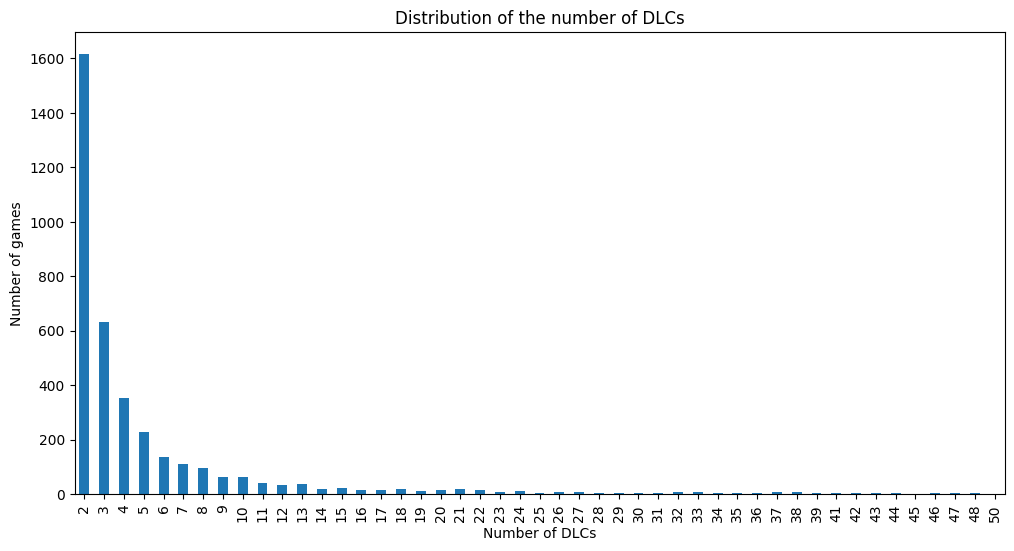

In [28]:
# Distribution of the number of DLCs (2 to 50)
dlc_counts = df['dlc_count'].value_counts().sort_index()
dlc_counts = dlc_counts[(dlc_counts.index >= 2) & (dlc_counts.index <= 50)]
plt.figure(figsize=(12, 6))
dlc_counts.plot(kind='bar')
plt.title('Distribution of the number of DLCs')
plt.xlabel('Number of DLCs')
plt.ylabel('Number of games')
plt.show()

In [29]:
# Maximum number of DLCs
df['dlc_count'].max()

2366

In [30]:
from wordcloud import WordCloud, STOPWORDS

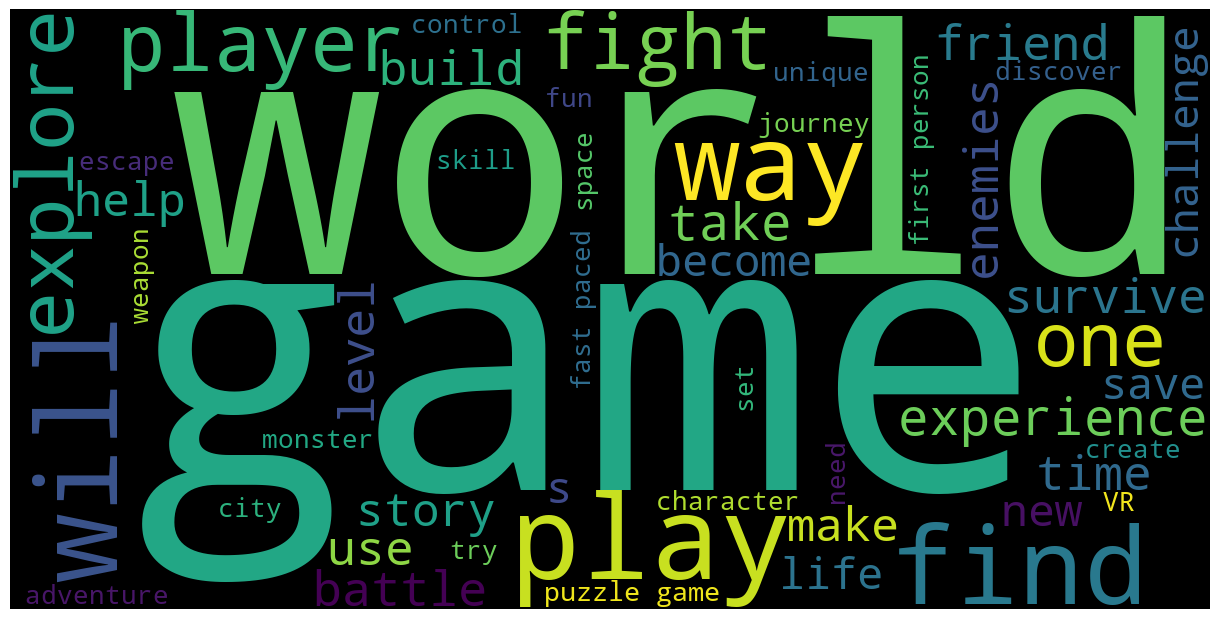

In [31]:
all_descriptions = ','.join(list(df['short_description'].values))
wordcloud = WordCloud(width = 1200, height = 600, max_words=50).generate(all_descriptions)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

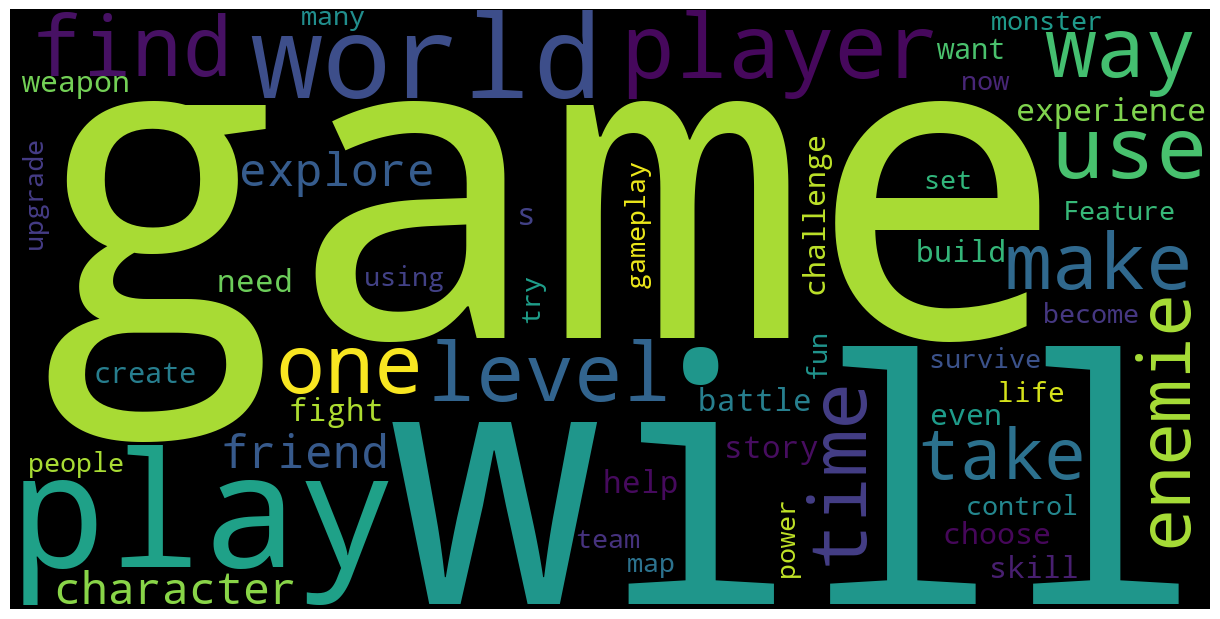

In [32]:
# Wordcloud: about_the_game
all_descriptions = ','.join(list(df['about_the_game'].values))
wordcloud = WordCloud(width = 1200, height = 600, max_words=50).generate(all_descriptions)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

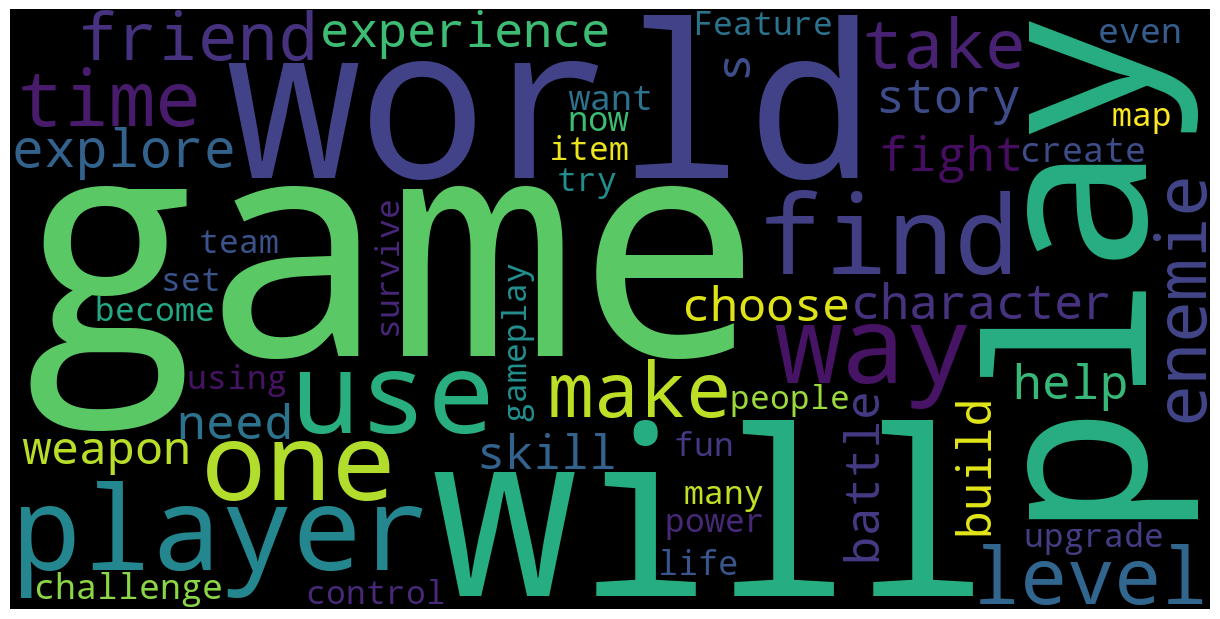

In [33]:
# Wordcloud: detailed_description
all_descriptions = ','.join(list(df['detailed_description'].values))
wordcloud = WordCloud(width = 1200, height = 600, max_words=50).generate(all_descriptions)
plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

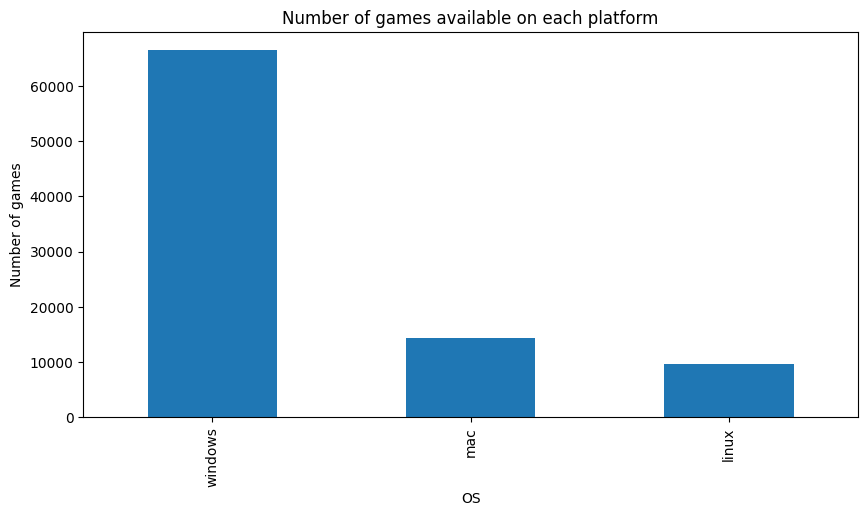

In [34]:
# OS support
platform_sums = df[['windows', 'mac', 'linux']].sum()
plt.figure(figsize=(10, 5))
platform_sums.plot(kind='bar')
plt.title('Number of games available on each platform')
plt.xlabel('OS')
plt.ylabel('Number of games')
plt.show()

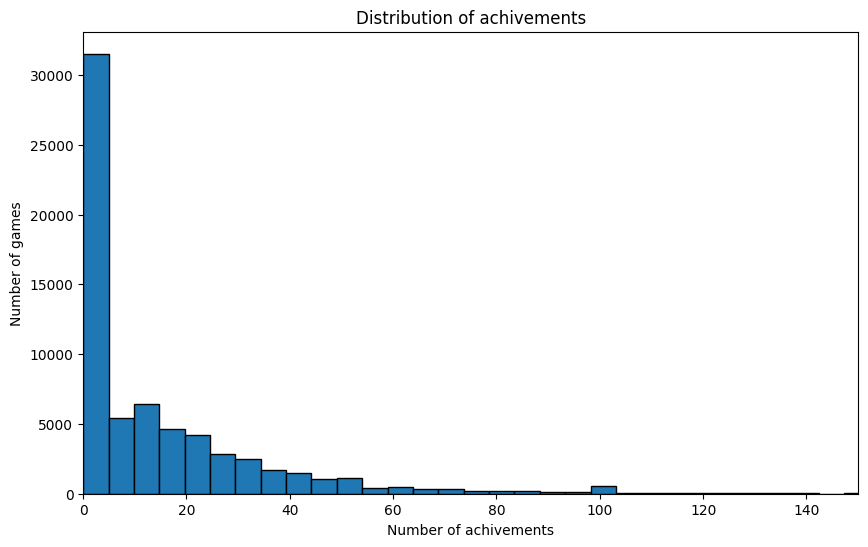

In [35]:
# Achievements (limited to 150)
plt.figure(figsize=(10, 6))
plt.hist(df['achievements'].dropna(), bins=2000, edgecolor='black')
plt.title('Distribution of achivements')
plt.xlabel('Number of achivements')
plt.ylabel('Number of games')
plt.xlim(0, 150)
plt.show()

In [36]:
# Proportion of games with 0 achievements
count_of_zero_achievements = (df['achievements'] == 0).sum()
total_rows = len(df)
round(count_of_zero_achievements / total_rows, 2)

0.44

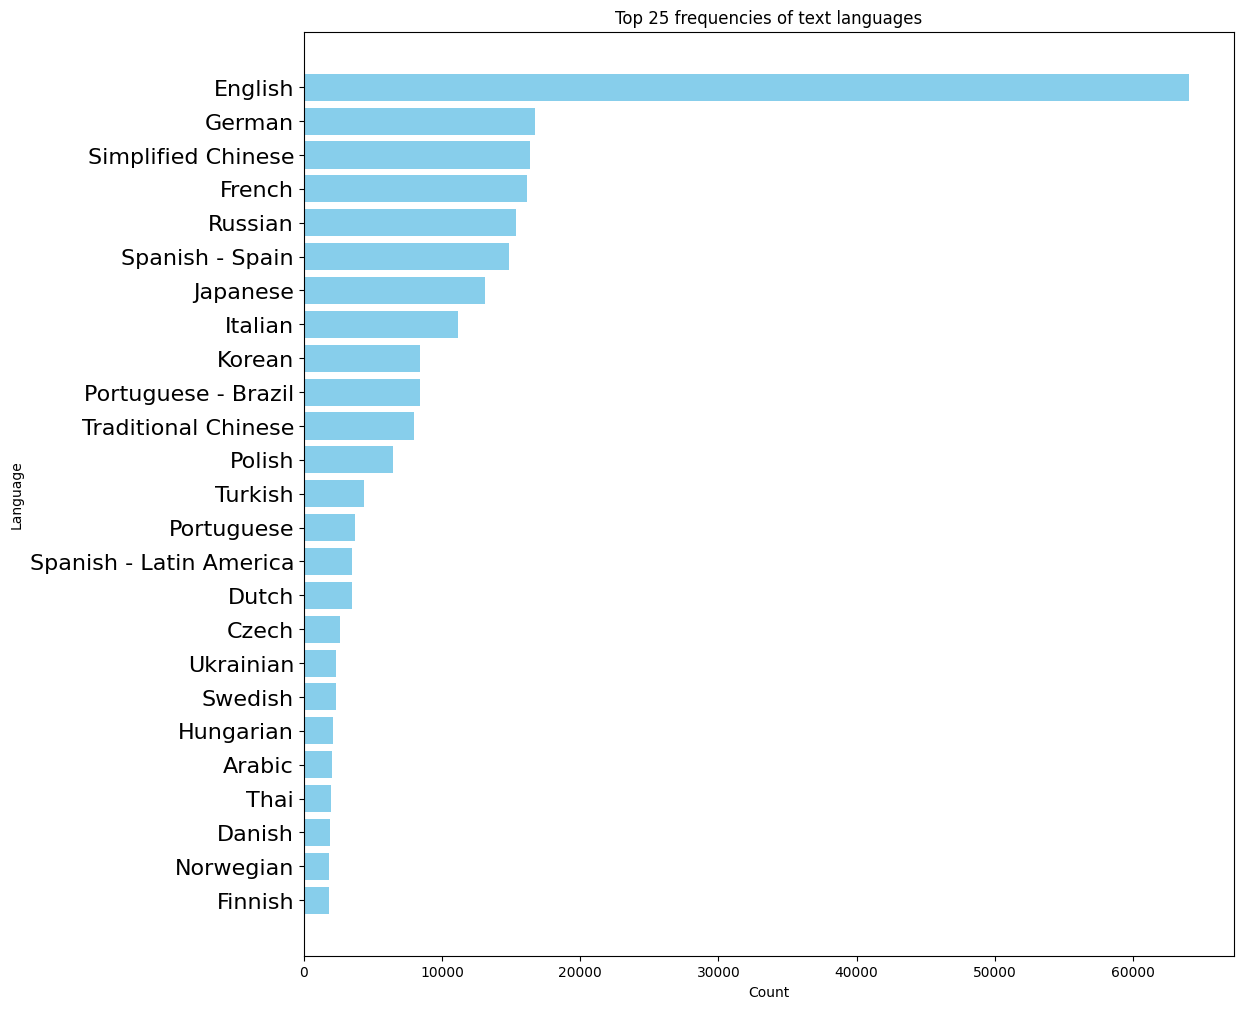

In [41]:
from collections import Counter
# Text languages (top 25)
all_languages = []
#remove the brackets and quotes from the supported_languages column
df['supported_languages'] = df['supported_languages'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for languages in df['supported_languages']:
    all_languages.extend(languages.split(', '))
language_counts = Counter(all_languages)
lang_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values('Count', ascending=False)
top_lang_df = lang_df.head(25)
plt.figure(figsize=(12, 12))
plt.barh(top_lang_df['Language'], top_lang_df['Count'], color='skyblue')
plt.title('Top 25 frequencies of text languages')
plt.ylabel('Language')
plt.xlabel('Count')
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

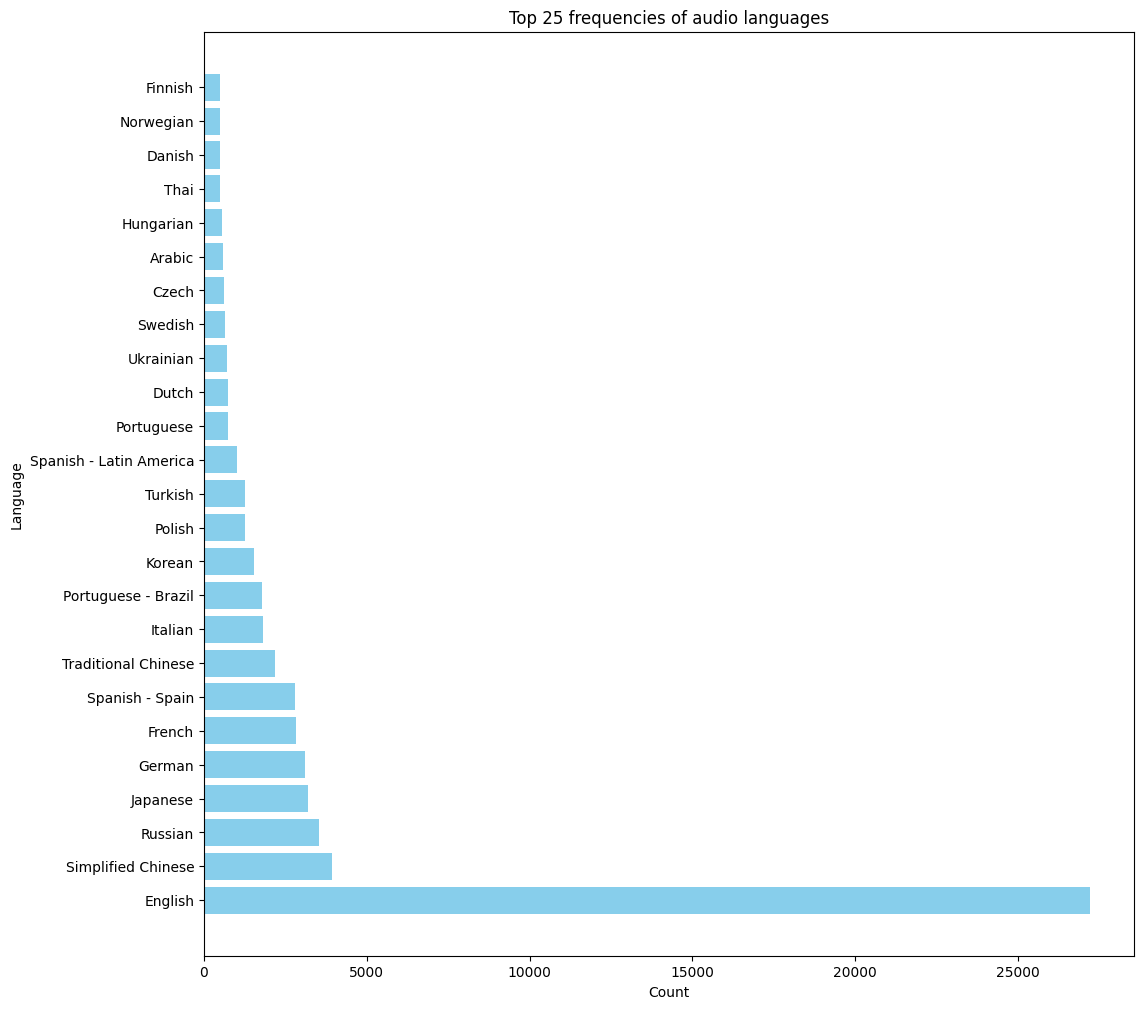

In [46]:
#Audio Languages
all_languages = []

df['full_audio_languages'] = df['full_audio_languages'].str.replace('[', '').str.replace(']', '').str.replace("'", '')

for languages in df['full_audio_languages']:
    all_languages.extend(languages.split(', '))
# Remove empty strings
all_languages = [lang for lang in all_languages if lang != '']
language_counts = Counter(all_languages)
lang_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values('Count', ascending=False)
top_lang_df = lang_df.head(25)
plt.figure(figsize=(12, 12))
plt.barh(top_lang_df['Language'], top_lang_df['Count'], color='skyblue')
plt.title('Top 25 frequencies of audio languages')
plt.ylabel('Language')
plt.xlabel('Count')
plt.show()


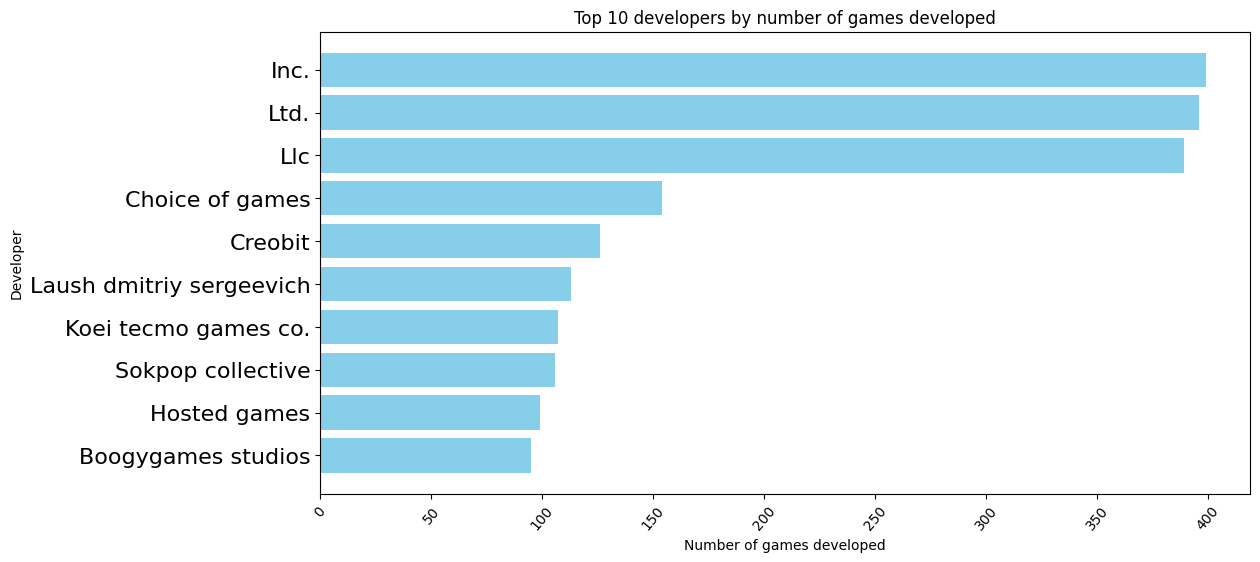

In [55]:
all_developers = []
df['developers'] = df['developers'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for developers in df['developers']:
    all_developers.extend(developers.split(', '))
# Capitalize each string so that the same developer is not counted twice
all_developers = [developer.strip().capitalize() for developer in all_developers]
developer_counts = Counter(all_developers)
top_developers = pd.DataFrame(developer_counts.most_common(10), columns=['Developer', 'Games Developed'])
plt.figure(figsize=(12, 6))
plt.barh(top_developers['Developer'], top_developers['Games Developed'], color='skyblue')
plt.title('Top 10 developers by number of games developed')
plt.ylabel('Developer')
plt.xlabel('Number of games developed')
plt.xticks(rotation=50)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

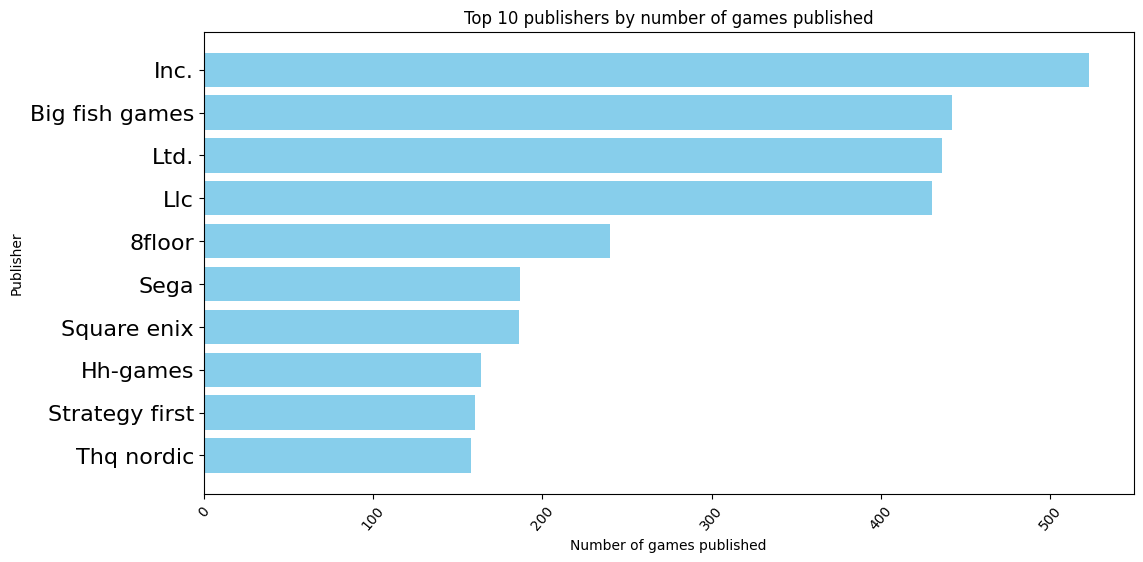

In [56]:
all_publishers = []
df['publishers'] = df['publishers'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for publishers in df['publishers']:
    all_publishers.extend(publishers.split(', '))
# Remove empty strings
all_publishers = [publisher for publisher in all_publishers if publisher != '']
all_publishers = [publisher.strip().capitalize() for publisher in all_publishers]
publisher_counts = Counter(all_publishers)
top_publishers = pd.DataFrame(publisher_counts.most_common(10), columns=['Publisher', 'Games Published'])
plt.figure(figsize=(12, 6))
plt.barh(top_publishers['Publisher'], top_publishers['Games Published'], color='skyblue')
plt.title('Top 10 publishers by number of games published')
plt.ylabel('Publisher')
plt.xlabel('Number of games published')
plt.xticks(rotation=50)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

In [59]:
all_developers = [dev for sublist in df['developers'].dropna() for dev in sublist]
len(set(all_developers))

1937

In [60]:
# Total number of publishers
all_publishers = [dev for sublist in df['publishers'].dropna() for dev in sublist]
len(set(all_publishers))

1719

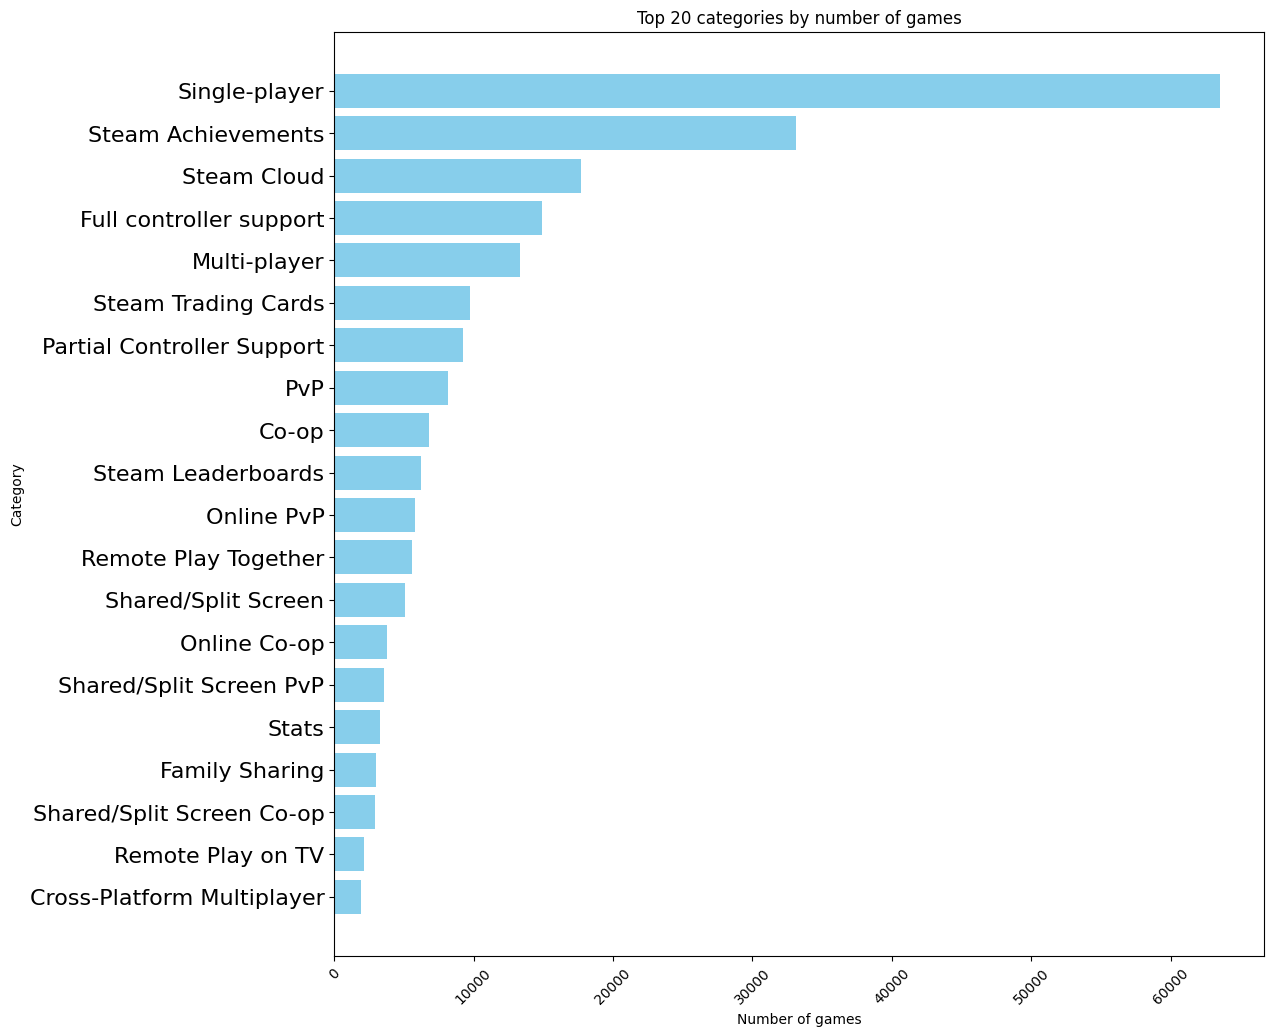

In [61]:
all_categories = []
df['categories'] = df['categories'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for categories in df['categories']:
    all_categories.extend(categories.split(', '))
# Remove empty strings
all_categories = [category for category in all_categories if category != '']
category_counts = Counter(all_categories)
top_categories = pd.DataFrame(category_counts.most_common(20), columns=['Category', 'Games'])
plt.figure(figsize=(12, 12))
plt.barh(top_categories['Category'], top_categories['Games'], color='skyblue')
plt.title('Top 20 categories by number of games')
plt.ylabel('Category')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()

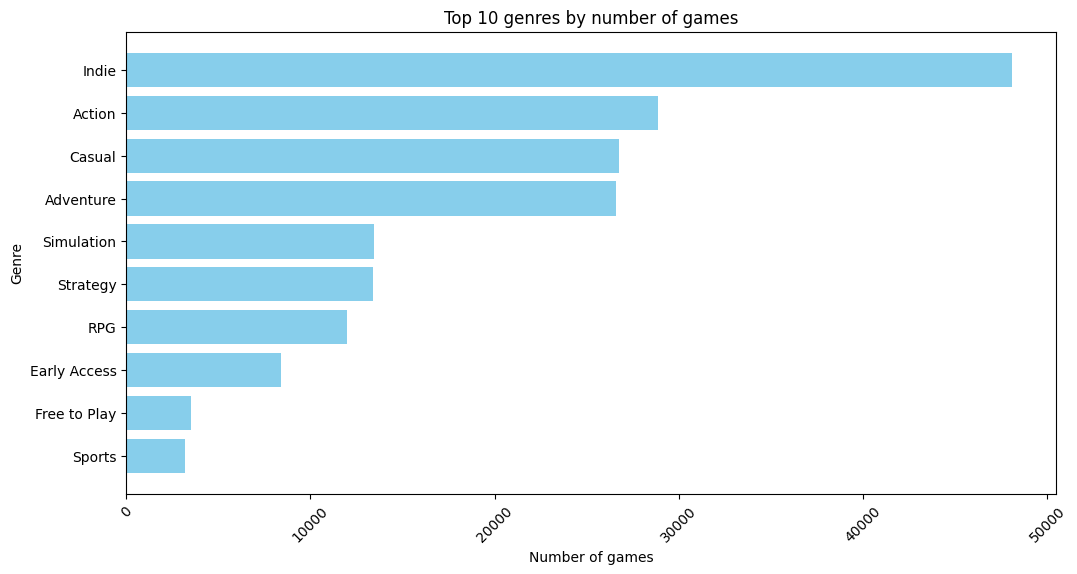

In [62]:
all_genres = []
df['genres'] = df['genres'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
for genres in df['genres']:
    all_genres.extend(genres.split(', '))
# Remove empty strings
all_genres = [genre for genre in all_genres if genre != '']
genre_counts = Counter(all_genres)
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Number of Games'])
plt.figure(figsize=(12, 6))
plt.barh(top_genres['Genre'], top_genres['Number of Games'], color='skyblue')
plt.title('Top 10 genres by number of games')
plt.ylabel('Genre')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

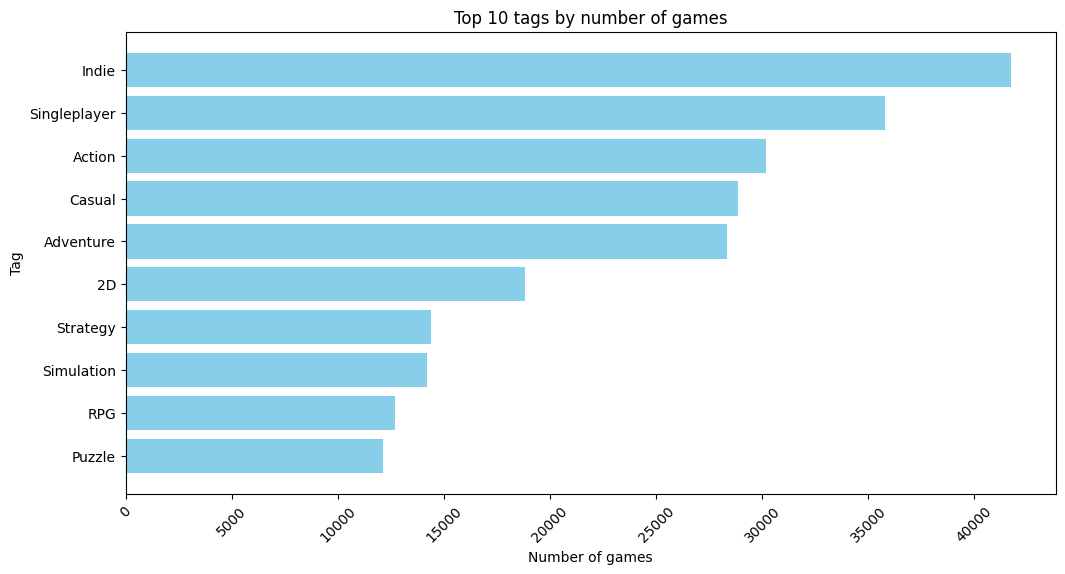

In [66]:
all_tags = []
df['tags'] = df['tags'].astype(str).str.replace('[', '').str.replace(']', '').str.replace("'", '')
for tags in df['tags']:
    all_tags.extend(tags.split(', '))
# Remove empty strings
all_tags = [tag for tag in all_tags if tag != '']
tag_counts = Counter(all_tags)
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Number of Games'])
plt.figure(figsize=(12, 6))
plt.barh(top_tags['Tag'], top_tags['Number of Games'], color='skyblue')
plt.title('Top 10 tags by number of games')
plt.ylabel('Tag')
plt.xlabel('Number of games')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

<AxesSubplot: xlabel='estimated_owners'>

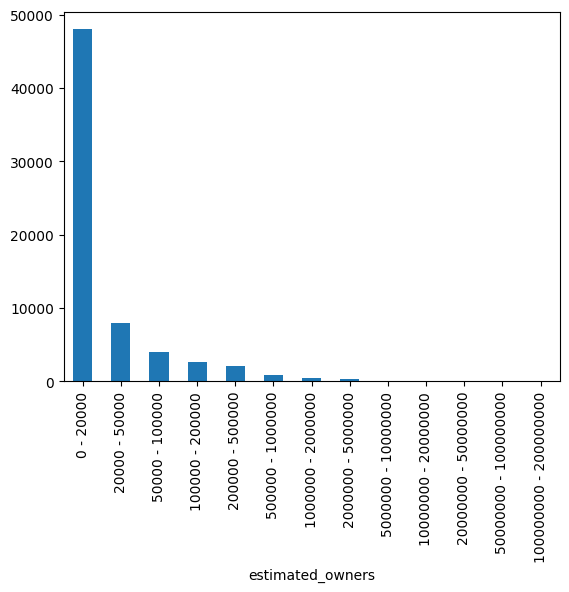

In [67]:
# Estimated units sold
df['estimated_owners'].value_counts().plot(kind='bar')

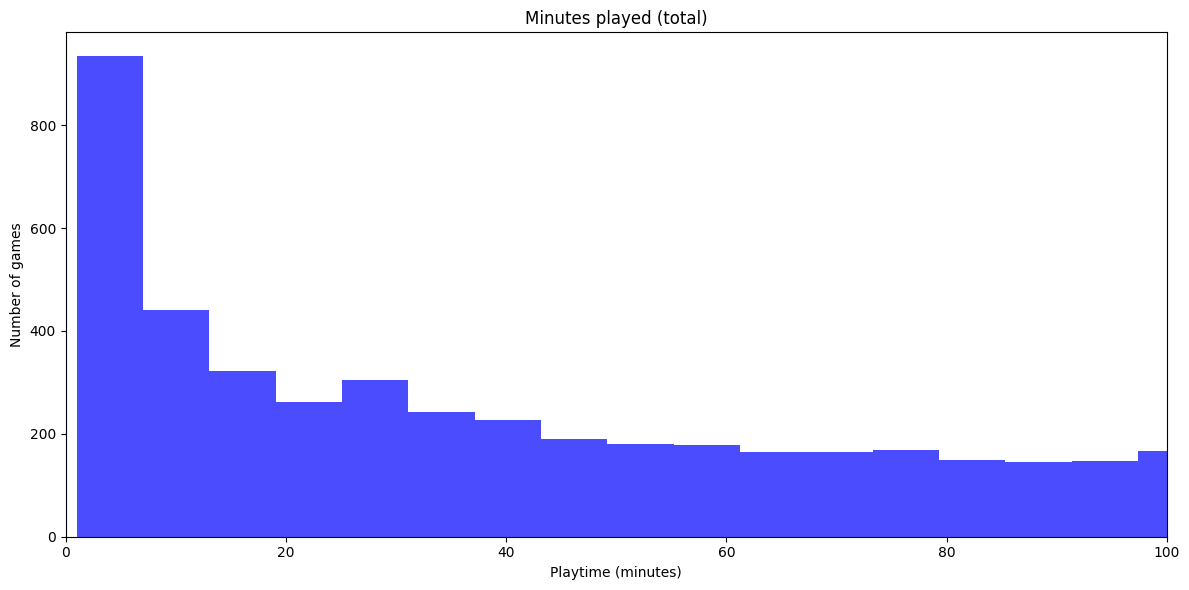

In [70]:
# Average playtime (excluding 0)
filtered_df = df[df['average_playtime_forever'] != 0]
plt.figure(figsize=(12, 6))
plt.hist(filtered_df['average_playtime_forever'], bins=15000, color='blue', alpha=0.7)
plt.title('Minutes played (total)')
plt.xlabel('Playtime (minutes)')
plt.ylabel('Number of games')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

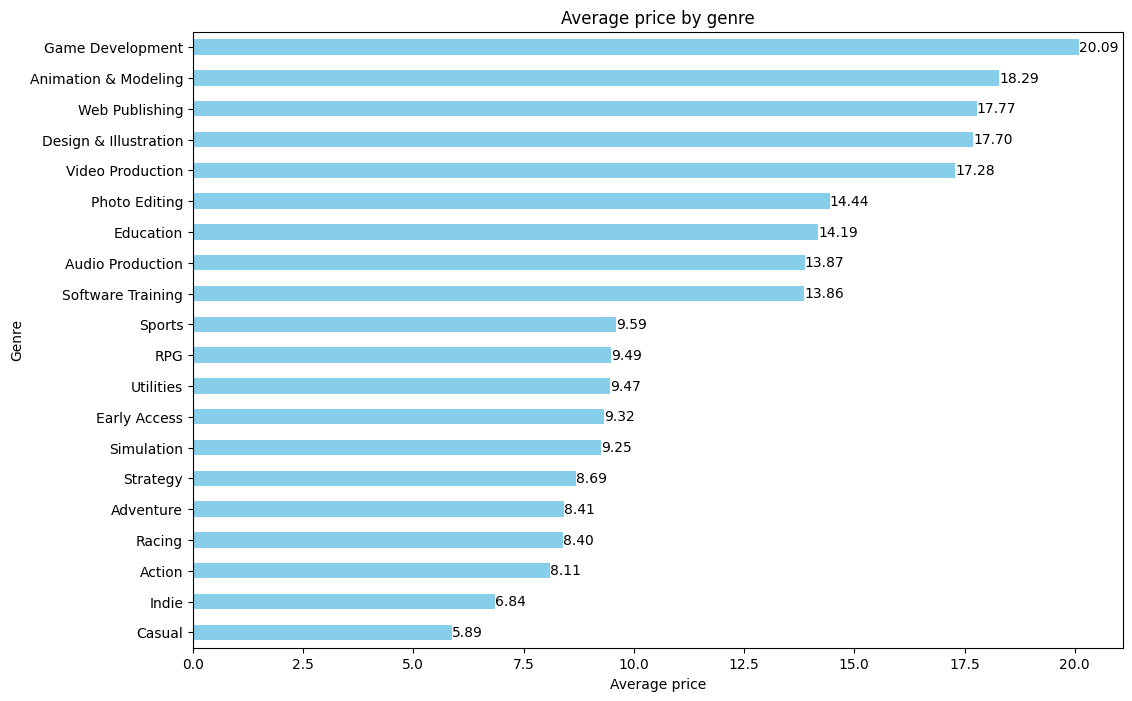

In [75]:
# Clean the genres column
df['genres'] = df['genres'].str.replace("'", '"')  # Replace single quotes with double quotes
df['genres'] = df['genres'].str.strip("[]")  # Remove brackets
df['genres'] = df['genres'].str.split(', ')  # Split by comma and space
exploded_df = df.explode('genres')
average_price_by_genre = exploded_df.groupby('genres')['price'].mean().sort_values()

# Limit to top 20 genres for better readability
top_genres = average_price_by_genre.tail(20)

plt.figure(figsize=(12, 8))
top_genres.plot(kind='barh', color='skyblue')
plt.title('Average price by genre')
plt.xlabel('Average price')
plt.ylabel('Genre')

# Rotate y-axis labels for better visibility
plt.yticks(rotation=0)

# Optionally, you can add text wrapping for long genre names
for index, value in enumerate(top_genres):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()

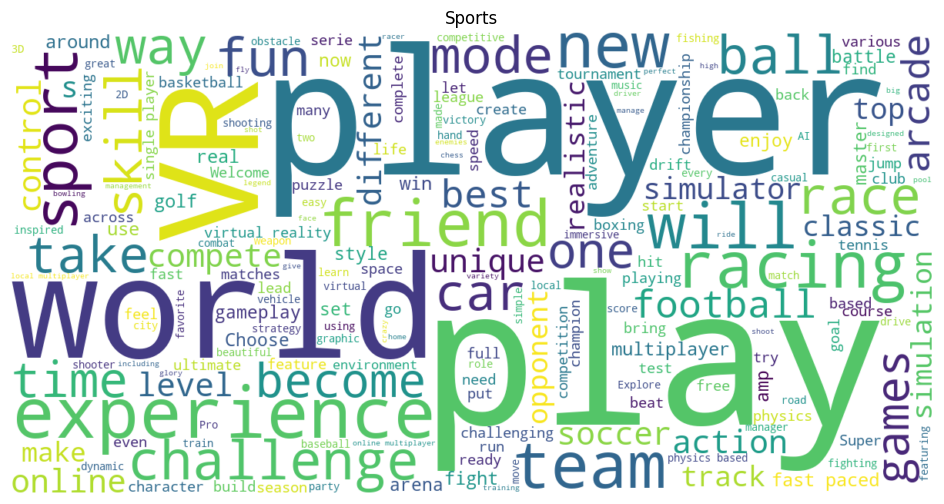

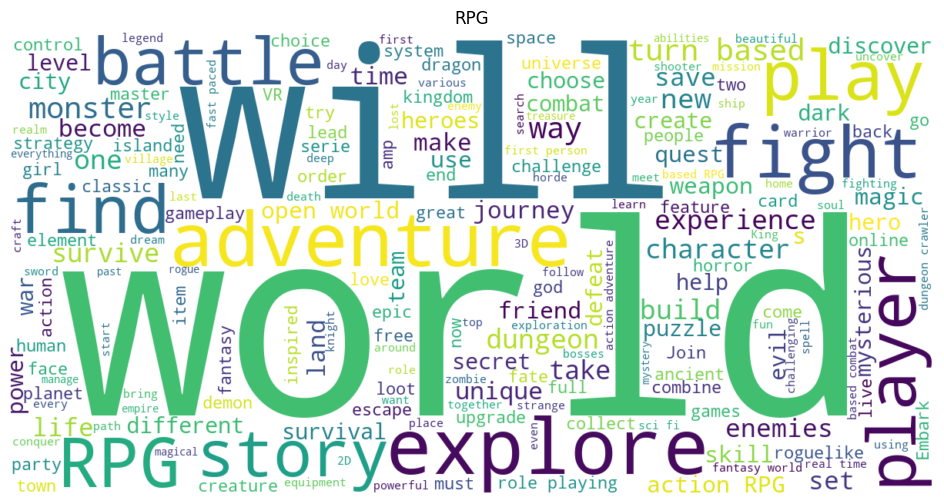

In [76]:
# Wordcloud by genres: Sports i RPG
exploded_df = df.explode('genres')
sports_df = exploded_df[exploded_df['genres'] == 'Sports']
rpg_df = exploded_df[exploded_df['genres'] == 'RPG']
sports_text = ' '.join(sports_df['short_description'].dropna())
rpg_text = ' '.join(rpg_df['short_description'].dropna())
def generate_wordcloud(text, title, additional_stopwords=None):
    stopwords = set(STOPWORDS)
    if additional_stopwords:
        stopwords = stopwords.union(additional_stopwords)
    wordcloud = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
generate_wordcloud(sports_text, 'Sports', additional_stopwords={'game'})
generate_wordcloud(rpg_text, 'RPG', additional_stopwords={'game'})

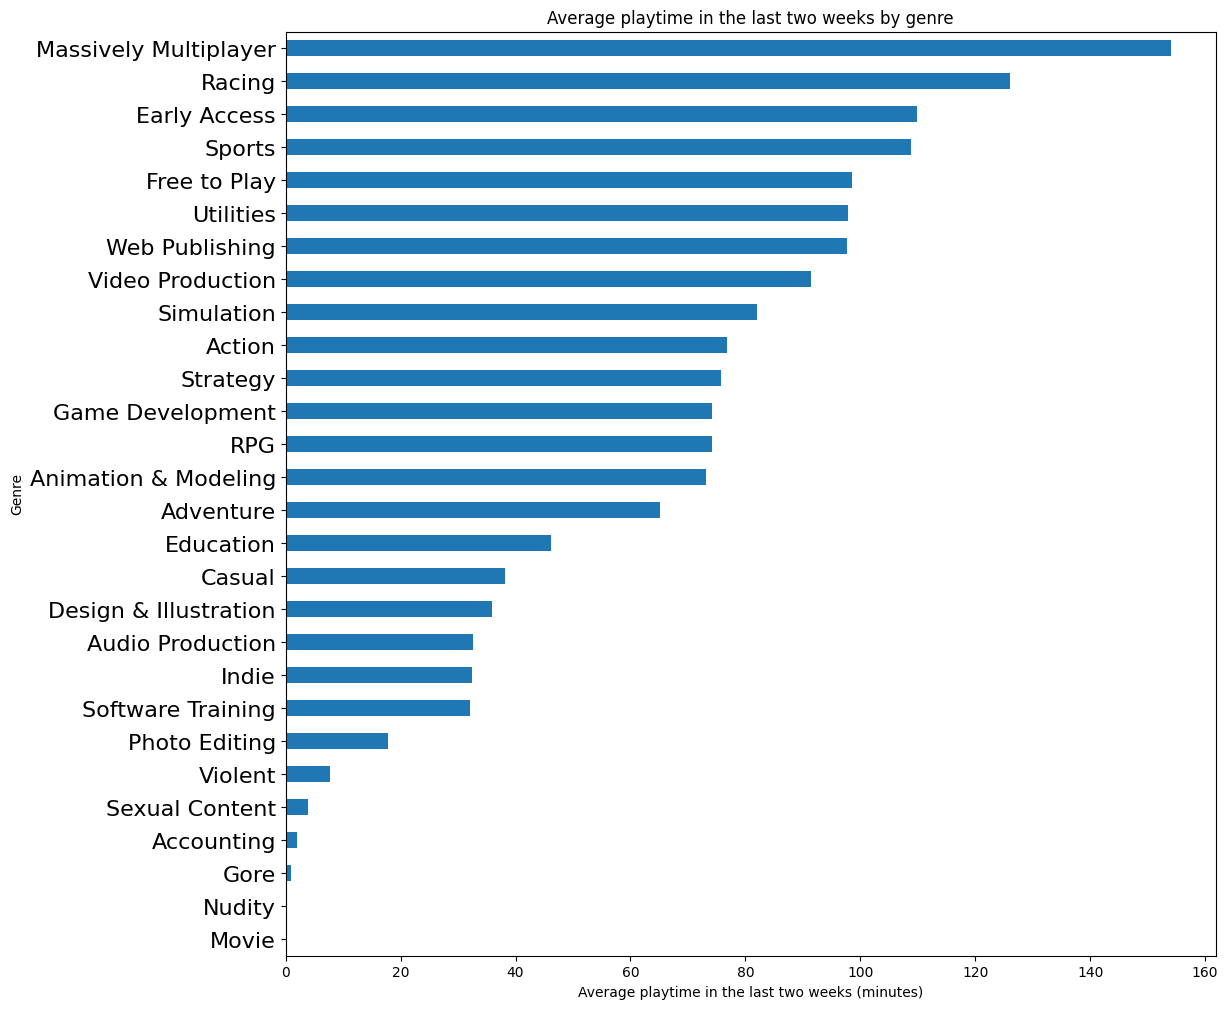

In [77]:
filtered_df = df[df['average_playtime_forever'] != 0]
df_expanded = filtered_df.explode('genres')
mean_playtimes = df_expanded.groupby('genres')['average_playtime_2weeks'].mean()
mean_playtimes_sorted = mean_playtimes.sort_values(ascending=False)
mean_playtimes_sorted.plot(kind='barh', figsize=(12, 12))
plt.title('Average playtime in the last two weeks by genre')
plt.ylabel('Genre')
plt.xlabel('Average playtime in the last two weeks (minutes)')
plt.gca().invert_yaxis()
plt.yticks(fontsize=16)
plt.show()